# Homework 4: Support Vector Machines
by Sashank Madipally

**Due date: 15th March 2023, 11:59 pm**

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by **15th March 2023, 11:59 pm**.

## **Question 1:** Binary Classification with SVMs (35 pts)

### 1.1 (15 pts)

#### 1.1.1 1. What is the mathematical intuition behind the notion of maximizing the margin in Support Vector Machines (SVMs)? How does this result in a better classifier?

The margin of the dataset is the largest possible margin for a dataset. Meaning the distance from the hyperplane to the closest point on both sides is maximized. If this is the choosen hyperplane, which only depends on these two points, then it intuitively makes sense that it will be a better classifier because the hyperplane is not arbitrarily closer to one side of the data as it would be in a non SVM algortihm. Maximixing the margin can be interpreeted as allowing for more fluctuation in possible datapoints so that future predictions might be more accurate. 

#### 1.1.2 How does the choice of the regularization parameter affect the performance of an SVM classifier?

The regularization parameter, usually denoted C, is used is the soft margin SVM approach which is common if the dataset is not linerlay seperable because in this case, the hard SVM will not be able to return a hyperplane. 
The effect of C is to allow a given about of leeway. A small c makes the leeway amount larger and a large c makes it small. With a very large C, there can be overfitting as the hyperplane is more pressured to have no errors, meaning it may take on a shape which doesn't reflect a real relationship between the classifications. 
Therefore, in terms of performance, a small c will allow for missclassification and so technically a lower performance, however it allows for the processing of non-seperable data. A large c creates better performance but too small leads to overfitting. 

#### 1.1.3 Can SVM be used for regression problems? Explain.

Yest, the SVM can be used to solve regression problems. 
Keeping the heart of SVM (maximizing the margin), suppose we have a set of data which we would like to find the linear regression for. If you run an SVM similar algoritihm such that it produces a line/hyperplane where the margin now is the maximized with some allowed deviance, it can produce a regression. 

### **1.2** (20 pts)

In this problem, you will gain intuition surrounding Support Vector Machines by solving a simple 2D case by hand. 

Suppose you have the following dataset:

$ \vec{x_P} = (0,3)^T, \vec{x_Q} = (-2,1)^T$ With label $y=-1$

$ \vec{x_R} = (-4,4)^T, \vec{x_S} = (-5,6)^T$ With label $y=+1$

#### **1.2.1**
Sketch the points in the x1-x2 plane. (Draw  and upload a Picture) 

**[SOLUTION]**

#### **1.2.2**
Compute the parameters of the hyperplane passing through $\vec{x_P}$ and $\vec{x_Q}$ and add it to your picture. 

**[SOLUTION]**

#### **1.2.3**
Compute the orthogonal projection of $\vec{x_R}$ onto the hyperplane in question 1.2.2

**[SOLUTION]**

#### **1.2.4**
Suppose we added another point $ \vec{x_T} = (0,0)^T$ with label $y=+1$.
Plot the updated data and discuss how we would go about applying SVM?

**[SOLUTION]**

In [1]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
%matplotlib inline

## **Question 2:** Feature Mapping (70 pts)

*Feature mapping* refers to the process of transforming the original input features of a dataset into a new set of features that may be more suitable for a particular learning task. In the context of support vector machines (SVMs), *feature mapping* is often used to transform the input features into a higher-dimensional space, where the data may become more separable.

In this question, we will see an example of feature mapping. The following code cell generates 500 data points consisiting of 2 classes. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) to know more about sklearn's make_circles() function.

In [61]:
# Generate some non-linear data using make_circles
X, y = make_circles(n_samples = 500, noise=0.1, factor=0.5, random_state=42)

**Visualize the generated dataset.**

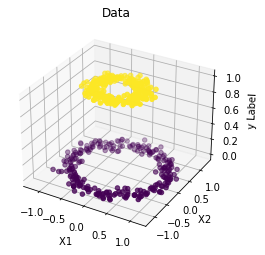

In [62]:
# ADD CODE HERE
# Visualize the original data
# Use matplotlib's scatter() function to visualize the data
# Keep in mind the concept of "array slicing"

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[0:,0],X[0:,1],y,c = y)

plt.title('Data')
ax.set_xlabel('X1 ')
ax.set_ylabel('X2 ')
ax.set_zlabel('y Label')

plt.show()

**Split the data into training and testing partitions.**

In [63]:
import sklearn
# ADD CODE HERE
# Splitting the dataset into training and test sets
# Use sklearn's train_test_split function
# Make a split of 80:20 training:testing data
# Set the random_state argument to 0
# The names of the variables must be X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

Now, you will define a function **svm_models()** to call a Support Vector Classifier model (which you will use for the rest of this assignment). The function signate is as follows:
<ol>
    <li>The function should be able to return a <b>Support Vector Classifier</b>.</li>
    <li>The arguments in the SVC must be passed through the function arguments.</li>
</ol>

**Hint**: Some arguments needed for SVC with RBF kernel might not be needed for SVC with Linear kernel. For such cases, you can initialize the function **default arguments** so that whenever you don't need a particular argument for a model, you can just ignore that argument.

In [64]:
# ADD CODE HERE
from sklearn import svm
# Defining svm_models() function
# Don't forget everything mentioned above
def svm_models(
    X_learn,
    y_learn,
    regp,
    kern,
    deg=3,
    gam='scale',
    coef=0):
    # X_learn, learning dataset N^d array
    # y_learn, learning labels N array 
    # regp, Classification parameter
    # kern, kernel to use as string. Ex: 'linear', 'rbf', 'poly', 'sigmoid' etc. 
    # deg, int. for poly kern.
    # gam, 'scale,'auto' or float. Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. 
    # coef, float. Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
  csc = svm.SVC(C=regp,kernel=kern,degree = deg, gamma = gam, coef0 = coef)
  csc.fit(X_learn,y_learn)

  return csc

**Call svm_models() to inititalize a Support Vector Classifier (SVC) model and train it on the training data. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for the documentation.**

In [65]:
# ADD CODE HERE
# Initialize the SVC model with a linear kernel and the regularization parameter "C" set to 1.0
# Then, train the initialized model using the training data
modl1 = svm_models(X_train,y_train,1,'linear')

**Calculate and print the test accuracy of the SVC model.**

In [66]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
print(modl1.score(X_test,y_test))

0.52


Text(0.5, 1.0, 'SVC with Linear Kernel')

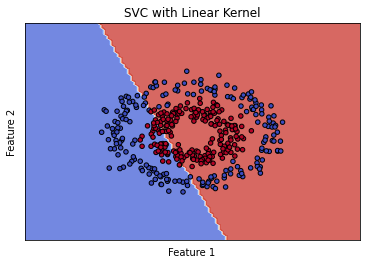

In [27]:
# Plotting the trained model's decision boundary
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS

ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        modl1, # CHANGE NAME HERE
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Linear Kernel")

**Why do you think the model performs poorly on this data?**

The model performs very poorly on this data because in the current dimensions, it is linearly unseperable. 

As we saw, the performance of our linear SVM model was poor on the original dataset. The model's accuracy was 52%. It means that our model was only able to guess the class even after training. In the following few code cells, we'll see the power of Feature Transformation. **In the following code cell, you will have to create a feature transformation of the following form**:
$$\phi(x_1, x_2) = \begin{bmatrix} (x_1)^2 \\ (x_2)^2 \\ 2x_1x_2 \end{bmatrix}$$
where $\phi(x_1, x_2)$ is the feature transformation function that takes as input a 2D dataset and outputs a 3D mapping of the same data.

In [34]:
# Define a feature mapping function to transform the 2D data to 3D

def feature_mapping(X):
    # ADD CODE HERE
    # Create and return a transformed dataset
    # The transformation must be according to the phi function shown above
    # Try taking the transpose of the row vector instead of creating a column vector
    # Return the transformed data
    X_new = np.zeros((np.size(X[:,0]),3))
    X_new[0:,0] = X[0:,0]**2
    X_new[0:,1] = X[0:,1]**2
    X_new[0:,2] = 2*X[0:,1]*X[0:,0]
    
    return X_new

# Transform the original 2D data to a 3D space
X_new = feature_mapping(X)

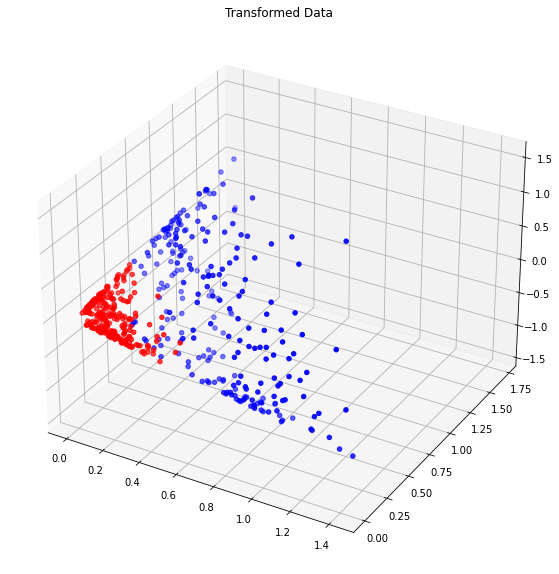

In [35]:
# Visualize the transformed data
# Verify if your feature_mapping function works correctly
# If its does, you would be able to see a 3D plot showcasing your dataset with a clear linearly seperable distribution

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap='bwr')
ax.set_title("Transformed Data")
plt.show()

As it can be seen, the data is clearly linearly seperable after the transformation.

**Split this transformed data into training and testing partitions. (Remember, the y vector i.e. the predictions have not changed. It's only the input X that has changed/transformed).**

In [37]:
# ADD CODE HERE
# Splitting the dataset into training and test sets
# Use sklearn's train_test_split function
# Make a split of 80:20 training:testing data
# Set the random_state argument to 0
# The names of the variables must be X_train, X_test, y_train, and y_test

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.20, random_state=0)

**Call svm_models() to inititalize and train an SVC model on this newly transformed data.**

In [38]:
# ADD CODE HERE
# The parameters of the model must be the same as earlier
# If the parameters are not the same, it won't be the same model
mod2 = svm_models(X_train,y_train,1,'linear')

**Calculate and print the test accuracy of this newly trained SVC model.**

In [40]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
mod2.score(X_test,y_test)

0.97

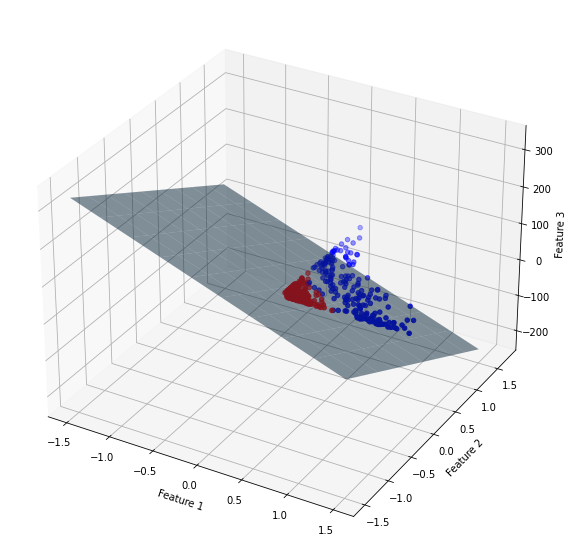

In [41]:
# Plot the decision boundary of the model on the transformed data
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS
# HERE, your_model_name IS IN MULTIPLE PLACES. DON'T FORGET TO CHANGE IT EVERYWHERE

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 10), np.linspace(-1.5, 1.5, 10))
zz = (-mod2.intercept_[0] - mod2.coef_[0][0]*xx - mod2.coef_[0][1]*yy) / mod2.coef_[0][2]  # CHANGE NAME HERE

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c = y_train, cmap='bwr')

ax.plot_surface(xx, yy, zz, alpha=0.5)

# Set the labels of the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Show the plot
plt.show()

## **Question 3:** Kernels in SVMs (55 pts)

When data is not linearly separable in the original feature space, SVMs can use a technique called the *kernel trick* to transform the data into a higher-dimensional space where it becomes more separable.

The *kernel function* used in SVMs effectively implements a feature mapping. It maps the input data into a new feature space, where the transformed data may be linearly separable. The choice of kernel function and its parameters are crucial to the performance of SVMs, and selecting an appropriate kernel function is often an important part of building an SVM model. Some commonly used kernel functions include Linear, Polynomial, and Radial Basis Function (RBF).

The following code cell generates 5000 data points consisiting of 3 classes. Refer to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to know more about sklearn's make_classification() function.

In [67]:
# generate non-linear data with 4 classes
X, y = make_classification(n_samples=5000, n_features=2, n_classes=3, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=7896)

**Visualize the generated dataset.**

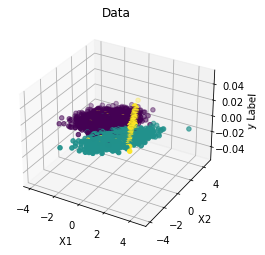

In [68]:
# ADD CODE HERE
# Visualize the generated data
# Similar to Data Visualization in Question 2
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[0:,0],X[0:,1],c = y)

plt.title('Data')
ax.set_xlabel('X1 ')
ax.set_ylabel('X2 ')
ax.set_zlabel('y Label')

plt.show()

**Split the data into training and testing partitions.**

In [69]:
# ADD CODE HERE
# Splitting the dataset into training and test sets
# Use sklearn's train_test_split function
# Make a split of 80:20 training:testing data
# Set the random_state argument to 0
# The names of the variables must be X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

**Call svm_models() to inititalize a Support Vector Classifier (SVC) model and train it on the training data.**

In [70]:
# ADD CODE HERE
# Initialize the SVC model with a linear kernel and the regularization parameter "C" set to 1.0
# Then, train the initialized model using the training data
mod3 = svm_models(X_train,y_train,1,'linear')

**Calculate and print the test accuracy of the SVC model.**

In [71]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
print(mod3.score(X_test,y_test))

0.869


Text(0.5, 1.0, 'SVC with Linear Kernel')

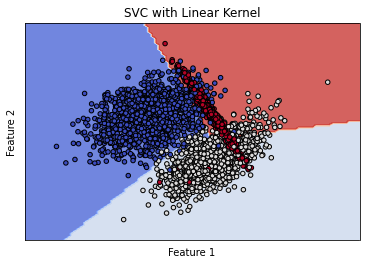

In [72]:
# Plotting the trained model's decision boundary
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS

ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        mod3, # CHANGE NAME HERE
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Linear Kernel")

As we can see, the linear SVM performs pretty well on this data. The accuracy of the model is **86.9%**. Can you think of improving the performance of the model? If so, how?<br>
**Hint**: Look at the composition of the data. Does it look like linearly seperable data? 

You could probably not improve the accuracy much using the linear kernel because the data doesn't appear to be linearly seperable. There are clearly red points intermingling with white points, blue points with the red, and blue with the white as well. There will always be some error and the reason this performs well is because overall the points for each class are strongly grouped and not very much mingled with the other classes. 

Now, we will train another model using one of the most commonly used kernels in SVMs, the *Radial Basis Function (RBF)* kernel.

The *RBF* kernel function takes two inputs, x and y, which are the input data points being compared. It first calculates the Euclidean distance between x and y, which measures how far apart they are in the original feature space. It then transforms this distance into a new value using a Gaussian distribution centered at zero. The transformed value represents the similarity between the two data points in the higher-dimensional space.

The RBF kernel function is expressed as:

$$K(x,y) = e^{(-\gamma||x-y||^2)}$$

where $K(x, y)$ is the similarity score between input data points $x$ and $y$, $\gamma$ is a tuning parameter that controls the shape of the Gaussian distribution, $||x-y||$ is the Euclidean distance between the two data points, and $e$ is the exponential function.

In SVMs, the RBF kernel is often used to transform the input data into a higher-dimensional space, where the data may be more easily separable by a linear decision boundary. The choice of $\gamma$ is a critical hyperparameter in the RBF kernel, as it controls the width of the Gaussian distribution and thus the extent to which nearby data points are considered similar.

**Call svm_models() to inititalize a  Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Radial Basis Function as the kernel.**

In [74]:
# ADD CODE HERE
# Initialize the SVC model with the RBF kernel and the regularization parameter "C" set to 1.0
# Set gamma to 0.7
# Then, train the initialized model using the training data
mod4 = svm_models(X_train,y_train,1,'rbf',gam=0.7)

**Calculate and print the test accuracy of the SVC model.**

In [76]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
print(mod4.score(X_test,y_test))

0.918


Text(0.5, 1.0, 'SVC with RBF Kernel')

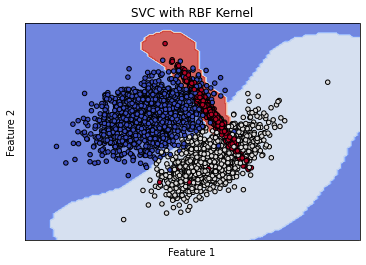

In [77]:
# Plotting the trained model's decision boundary
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS

ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        mod4, # CHANGE NAME HERE
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with RBF Kernel")

The *Polynomial kernel function* takes two inputs, $x$ and $y$, which are the input data points. It first calculates the inner product between the two data points in the original feature space. It then raises the result to a user-defined power ($degree$) and adds a constant term ($coef_0$) to the result. The transformed value represents the similarity between the two data points in the higher-dimensional space.

The polynomial kernel function is expressed as:

$$K(x,y) = (\gamma<x,y> + coef_0)^{degree}$$

where $K(x,y)$ is the similarity score between input data points $x$ and $y$, gamma is a tuning parameter that controls the influence of the inner product, $coef_0$ is a constant term that shifts the result, degree is the degree of the polynomial function, $<x,y>$ is the inner product between the two data points.

**Call svm_models() to inititalize a  Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Polynomial Function with Degree 3 as the kernel.**

In [78]:
# ADD CODE HERE
# Initialize the SVC model with a Polynomial Kernel of Degree 3 and set the regularization parameter "C" to 1.0
# Set gamma to auto
# Then, train the initialized model using the training data
mod5 = svm_models(X_train,y_train,1,'poly',deg=3, gam = 'auto') #note, using coef =0 as default. 

In [79]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
print(mod5.score(X_test,y_test))

0.883


Text(0.5, 1.0, 'SVC with Polynomial (Degree 3) Kernel')

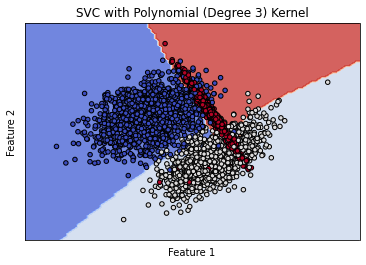

In [80]:
# Plotting the trained model's decision boundary
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS

ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        mod5, # CHANGE NAME HERE
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Polynomial (Degree 3) Kernel")

In class, we learned that a more complex model doesn't necessarily mean a better model. If the model becomes too complex, it will overfit the training data and perform poorly on the testing data. Now, we will see an example of this.

The Support Vector Classifier with a Polynomial Kernel of degree 3 gave a test accuracy of 88.3%. Now, let us train a Support Vector Classifier with a Polynomial Kernel of degree 4 (the latter is more complex than the former) and see how it performs.

**Call svm_models() to inititalize a Support Vector Classifier (SVC) model and train it on the training data. This time, however, use Polynomial Function with Degree 4 as the kernel.**

In [81]:
# ADD CODE HERE
# Initialize the SVC model with a Polynomial Kernel of Degree 4 and set the regularization parameter "C" to 1.0
# Set gamma to auto
# Then, train the initialized model using the training data
mod6 = svm_models(X_train,y_train,1,'poly',deg=4, gam = 'auto')

In [82]:
# ADD CODE HERE
# Use model.score() to find the model's test accuracy
# Print the accuracy
print(mod6.score(X_test,y_test))

0.556


Text(0.5, 1.0, 'SVC with Polynomial (Degree 4) Kernel')

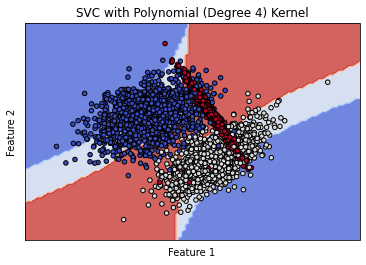

In [83]:
# Plotting the trained model's decision boundary
# DON'T FORGET TO CHANGE your_model_name TO YOUR MODEL's VARIABLE NAME
# THE CODE WOULD THROW AN ERROR IF YOU MISS THIS

ax = plt.axes()

disp = DecisionBoundaryDisplay.from_estimator(
        mod6, # CHANGE NAME HERE
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )


ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with Polynomial (Degree 4) Kernel")

As it can be seen, the SVC model with Polynomial Degree 4 performs pretty poorly on the test data with an accuracy of 55.5%. A lesser complex model (SVC model with Polynomial Degree 3) is much better with a test accuracy of 88.3%.